In [86]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.interpolate import griddata
from scipy import ndimage
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [87]:
def col(data): 
    x = np.array(data['x'])
    y = np.array(data['y'])
    z = np.array(data['z'])
    i = np.array(data['counts'])
    return [x,y,z,i]

In [96]:
def import_data(fid):
    #import
    array = pandas.read_csv(fid,sep = ' ',skiprows=10, header = None)
    array.columns = ['x','y','z','counts']
    #normalise
    #array['counts'] = np.array(array['counts'])/(np.array(total['counts']))
    #Remove indices with value=0
    indexNames = array[ (array['counts'] == 0)].index
    array.drop(indexNames , inplace=True)
    
    return array

Find files in the folder

In [97]:
import glob, os
cwd = os.getcwd()
files = []
for file in os.listdir(cwd):
    if file.endswith('.txt'):
        files.append(file)

In [98]:
fid = 'a25295_1 (7) - OH-.txt'
ion_data = import_data(fid)

FileNotFoundError: [Errno 2] File a25295_1 (7) - OH-.txt does not exist: 'a25295_1 (7) - OH-.txt'

In [101]:
def plot_data(ion_data, name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.flip(col(ion_data)[0])
    y = np.flip(col(ion_data)[1])
    z = -np.flip(col(ion_data)[2])
    c = np.flip(col(ion_data)[3])

    img = ax.scatter(x, y, z, c=c,s=1, alpha = 0.5, cmap='plasma',vmin=0,vmax=5) 
    fig.colorbar(img)
    ax.zaxis.set_rotate_label(False) 
    ax.set_title(name)
    ax.set_xlabel('x / $/mu$m')   # x-axis label
    ax.set_ylabel('y / $/mu$m')   # y-axis label 
    ax.set_zlabel('Sputter time / s',rotation= 90)   # z-axis label
    ax.set_xlim(0,127)
    ax.set_ylim(0,127)
    ax.set_zlim(-200,0)
    ax.view_init(elev=60,azim=40)  # elev for verticle rotation and azim for horizontal rotation 
    ax.grid(False)  # for gridlines remove 'False'
    plt.axis('on')  # to axis lines keep 'on'
    plt.show() 
    fig.savefig(name,transparent=True, dpi=600)
    return

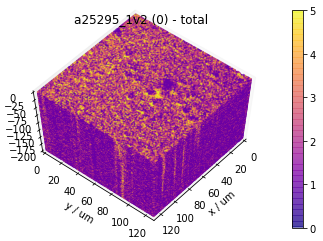

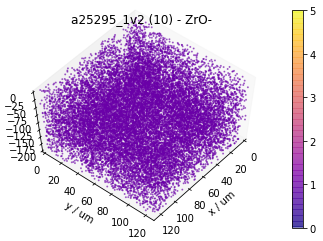

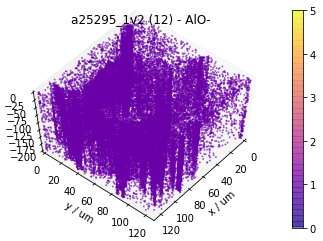

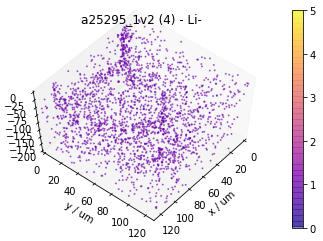

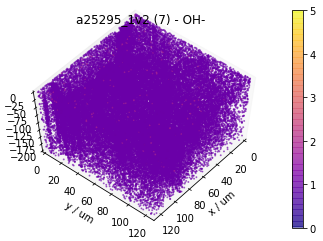

In [102]:
for file in files:
    data = import_data(file)
    plot_data(data,file.split('.')[0])